# Support Vector Machine

In [1]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 

# Membaca dataset yang sudah di-balance
df_balanced = pd.read_csv('data-analisis/datasets-balanced.csv')

# Memisahkan fitur dan label
X = df_balanced.drop(columns=['label'])  # Menghapus kolom label
y = df_balanced['label']  # Mengambil kolom label

# Membagi dataset menjadi data latih (80%) dan data uji 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membuat model SVM
svm_model = SVC(kernel='linear', random_state=42)  # Anda bisa mengganti kernel sesuai kebutuhan
svm_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi model menggunakan cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)  # Menggunakan 5-fold cross-validation

# Menampilkan hasil cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")


Confusion Matrix:
[[500  71  20]
 [ 15 558  18]
 [ 12  45 534]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.95      0.85      0.89       591
      Netral       0.83      0.94      0.88       591
     Positif       0.93      0.90      0.92       591

    accuracy                           0.90      1773
   macro avg       0.90      0.90      0.90      1773
weighted avg       0.90      0.90      0.90      1773


Cross-Validation Scores:
[0.81556684 0.82177101 0.87986464 0.94190637 0.91878173]
Mean Cross-Validation Score: 0.8756
Standard Deviation of Cross-Validation Scores: 0.0506


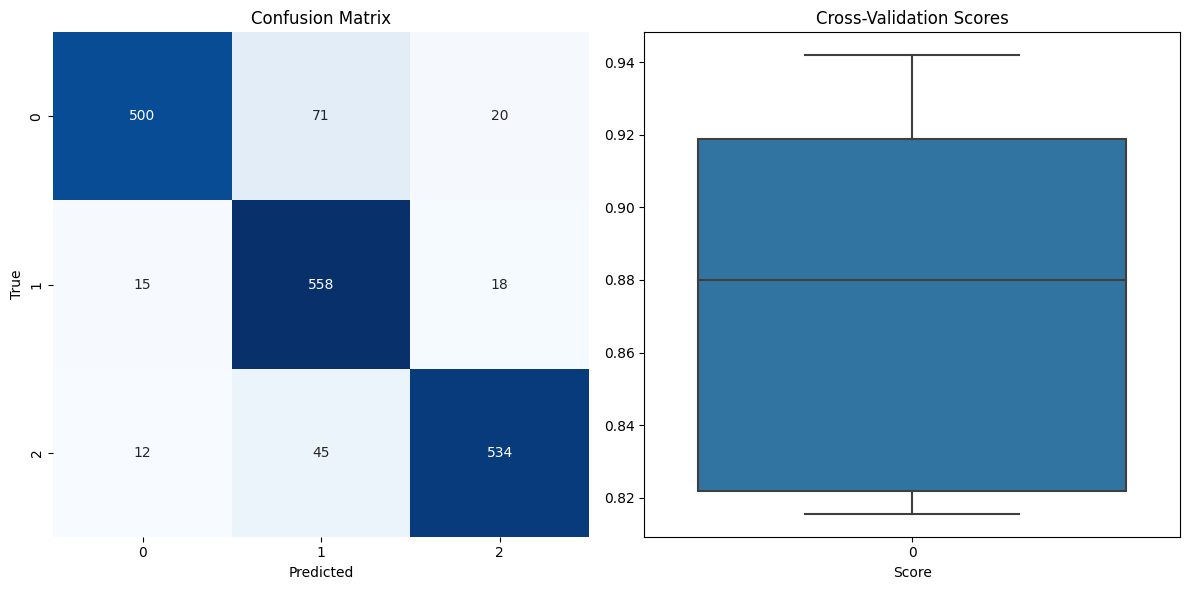

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 6))

# Subplot for Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subplot for Cross-Validation Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_scores, orient='w')
plt.title('Cross-Validation Scores')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

In [3]:
# save model
import joblib # type: ignore

with open('model-svm.pkl', 'wb') as file:
    joblib.dump(svm_model, file)

In [5]:
import joblib
from sklearn.metrics import classification_report

# Menampilkan hasil evaluasi
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get report as dict

# # Save the model
# joblib.dump(svm_model, 'HASIL-RISET/svm_model-new.')  # Save the model to a file

# Save evaluation results
results = {
    'Confusion Matrix': [conf_matrix.flatten()],  # Flatten for easier saving
    'Classification Report': [class_report],
    'Cross-Validation Scores': [cv_scores.tolist()],
    'Mean CV Score': [cv_scores.mean()],
    'Std Dev CV Score': [cv_scores.std()]
}

results_df = pd.DataFrame(results)
results_df.to_csv('HASIL-RISET/evaluation_results_SVM-new.csv', index=False)  # Save results to CSV

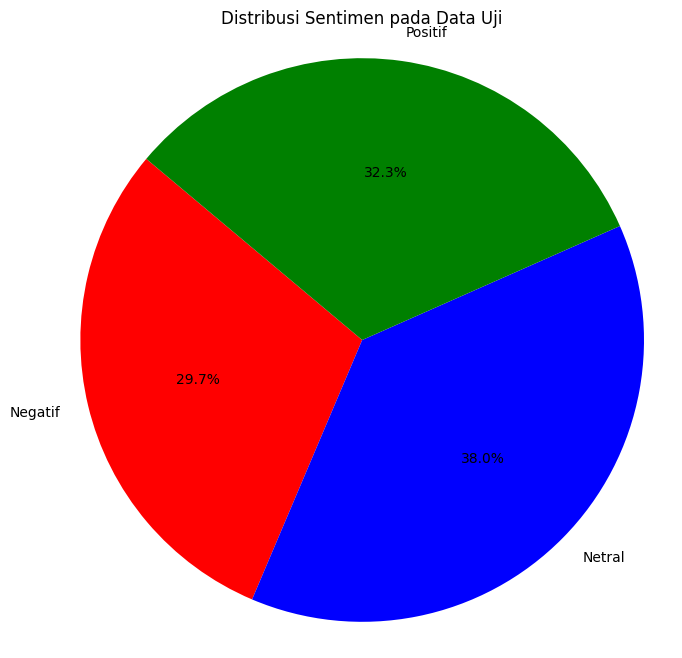

In [6]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np
import pandas as pd

# Muat data uji
# X_test = pd.read_csv('HASIL-RISET/X_test.csv')

# # Muat model dari file joblib
# nb_model = joblib.load('HASIL-RISET/svm_model.pkl')

# Lakukan prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Ekspor hasil prediksi ke file CSV
predictions_df = pd.DataFrame(y_pred, columns=['predicted_label'])
predictions_df.to_csv('HASIL-RISET/predict_SVM.csv', index=False)

# Hitung jumlah prediksi untuk setiap kelas
unique, counts = np.unique(y_pred, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Buat pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['red', 'blue', 'green']
# explode = (0.1, 0, 0)  # Hanya meledakkan bagian pertama (Negatif)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=140)
plt.title('Distribusi Sentimen pada Data Uji')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

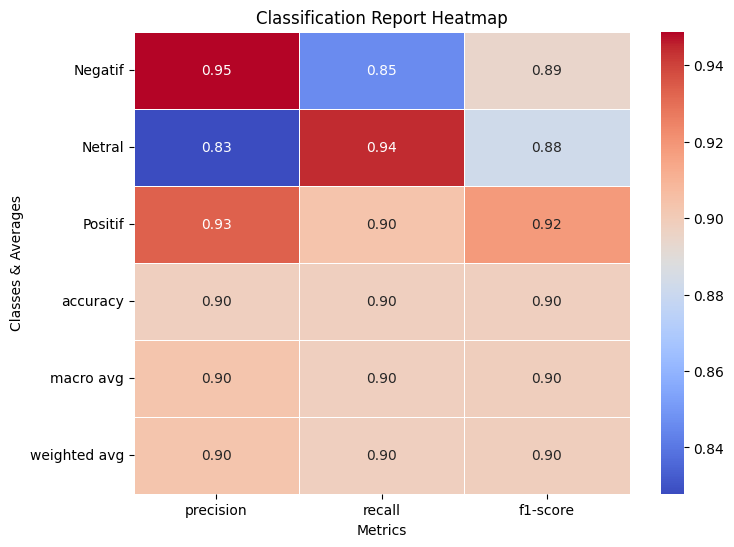

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Mendapatkan classification report dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengonversi ke DataFrame untuk visualisasi
df_report = pd.DataFrame(report).T

# Menghapus support karena bukan metrik evaluasi
df_report = df_report.drop(columns=['support'])

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.ylabel("Classes & Averages")
plt.xlabel("Metrics")
plt.show()

In [1]:
import pandas as pd

df = pd.read_csv('HASIL-RISET/evaluation_results_SVM.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Confusion Matrix         1 non-null      object 
 1   Classification Report    1 non-null      object 
 2   Cross-Validation Scores  1 non-null      object 
 3   Mean CV Score            1 non-null      float64
 4   Std Dev CV Score         1 non-null      float64
dtypes: float64(2), object(3)
memory usage: 172.0+ bytes
